In [1]:
# import dependencies

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [3]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

592

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2c6a5c7b509fda8562fb78d6e53441ad


In [5]:
# # Create an endpoint URL for a city.
# city_url = url + '&q=' + 'Boston'
# city_weather

In [6]:
# # using f string
# city = 'Boston'
# boston_url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}'
# boston_weather = requests.get(boston_url)
# boston_weather

In [7]:
# boston_data = boston_weather.json()
# boston_data

In [8]:
# lat = boston_data["coord"]["lat"]
# lng = boston_data["coord"]["lon"]
# max_temp = boston_data["main"]["temp_max"]
# humidity = boston_data["main"]["humidity"]
# clouds = boston_data["clouds"]["all"]
# wind = boston_data["wind"]["speed"]
# print(lat, lng, max_temp, humidity, clouds, wind)

In [9]:
# date = datetime.utcfromtimestamp(boston_data['dt']).strftime('%Y-%m-%d %H:%M:%S')
# date

In [10]:
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port augusta
Processing Record 3 of Set 1 | gamba
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | artyom
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | baykit
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Se

Processing Record 38 of Set 4 | aasiaat
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | sergeyevka
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | fayaoue
Processing Record 45 of Set 4 | saint-joseph
Processing Record 46 of Set 4 | matiari
Processing Record 47 of Set 4 | caloundra
Processing Record 48 of Set 4 | hihifo
City not found. Skipping...
Processing Record 49 of Set 4 | chumikan
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | marzuq
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | floro
Processing Record 4 of Set 5 | port pirie
Processing Record 5 of Set 5 | lazaro cardenas
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | vestmannaeyjar
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set 5 | margate
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 

Processing Record 27 of Set 8 | laramie
Processing Record 28 of Set 8 | hithadhoo
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | hong gai
Processing Record 31 of Set 8 | araouane
Processing Record 32 of Set 8 | molina
Processing Record 33 of Set 8 | verkhnyaya sinyachikha
Processing Record 34 of Set 8 | karratha
Processing Record 35 of Set 8 | lincoln
Processing Record 36 of Set 8 | sabang
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | rabo de peixe
Processing Record 39 of Set 8 | houma
Processing Record 40 of Set 8 | tecoanapa
Processing Record 41 of Set 8 | bowen
Processing Record 42 of Set 8 | itarema
Processing Record 43 of Set 8 | benghazi
Processing Record 44 of Set 8 | nakhon phanom
Processing Record 45 of Set 8 | zaysan
Processing Record 46 of Set 8 | san cristobal
Processing Record 47 of Set 8 | samarai
Processing Record 48 of Set 8 | sorvag
City not found. Skipping...
Processing Record 49 of Set 8 | surt
Processing Record 50 of

Processing Record 13 of Set 12 | ugoofaaru
Processing Record 14 of Set 12 | nantucket
Processing Record 15 of Set 12 | ozgon
City not found. Skipping...
Processing Record 16 of Set 12 | mosquera
Processing Record 17 of Set 12 | necochea
Processing Record 18 of Set 12 | kanigoro
Processing Record 19 of Set 12 | yaan
Processing Record 20 of Set 12 | san patricio
Processing Record 21 of Set 12 | newport
Processing Record 22 of Set 12 | cancun
Processing Record 23 of Set 12 | tabas
Processing Record 24 of Set 12 | cassilandia
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | dedovichi
Processing Record 27 of Set 12 | najran
Processing Record 28 of Set 12 | havoysund
Processing Record 29 of Set 12 | nikolayevka
Processing Record 30 of Set 12 | manzanillo
Processing Record 31 of Set 12 | sinkat
City not found. Skipping...
Processing Record 32 of Set 12 | llanes
Processing Record 33 of Set 12 | kutulik
Processing Record 34 of Set 12 | jardinopolis
Processing Record 35 

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,93,40,3.44,AR,2021-09-21 12:54:03
1,Port Augusta,-32.5000,137.7667,55.54,83,17,8.97,AU,2021-09-21 12:56:50
2,Gamba,-2.6500,10.0000,77.38,76,100,9.53,GA,2021-09-21 12:56:50
3,Atuona,-9.8000,-139.0333,77.27,71,11,19.91,PF,2021-09-21 12:56:51
4,Artyom,40.4723,50.3330,80.74,67,0,8.32,AZ,2021-09-21 12:56:51
...,...,...,...,...,...,...,...,...,...
535,Elko,41.0002,-115.5012,40.64,61,0,5.01,US,2021-09-21 12:59:09
536,Awbari,26.5921,12.7805,98.06,9,0,17.74,LY,2021-09-21 12:59:09
537,Vila Do Maio,15.1333,-23.2167,86.79,78,12,10.85,CV,2021-09-21 12:59:10
538,Hualmay,-11.0964,-77.6139,62.20,82,56,8.28,PE,2021-09-21 12:59:10


In [13]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-09-21 12:54:03,-54.8000,-68.3000,44.26,93,40,3.44
1,Port Augusta,AU,2021-09-21 12:56:50,-32.5000,137.7667,55.54,83,17,8.97
2,Gamba,GA,2021-09-21 12:56:50,-2.6500,10.0000,77.38,76,100,9.53
3,Atuona,PF,2021-09-21 12:56:51,-9.8000,-139.0333,77.27,71,11,19.91
4,Artyom,AZ,2021-09-21 12:56:51,40.4723,50.3330,80.74,67,0,8.32
...,...,...,...,...,...,...,...,...,...
535,Elko,US,2021-09-21 12:59:09,41.0002,-115.5012,40.64,61,0,5.01
536,Awbari,LY,2021-09-21 12:59:09,26.5921,12.7805,98.06,9,0,17.74
537,Vila Do Maio,CV,2021-09-21 12:59:10,15.1333,-23.2167,86.79,78,12,10.85
538,Hualmay,PE,2021-09-21 12:59:10,-11.0964,-77.6139,62.20,82,56,8.28


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

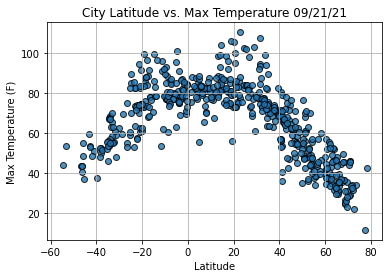

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

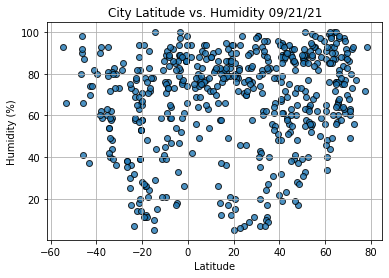

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

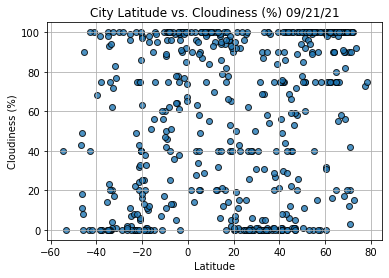

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

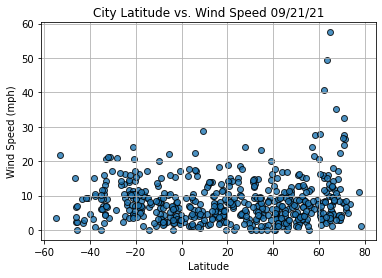

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

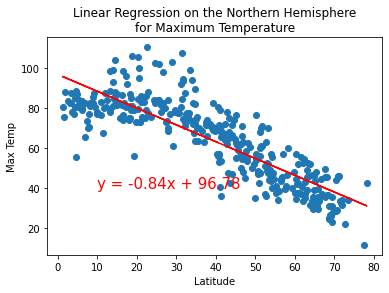

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

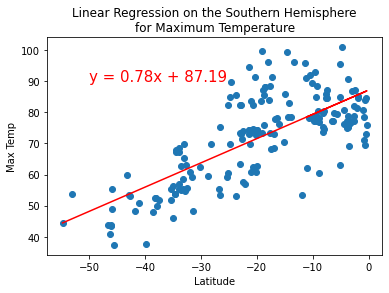

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

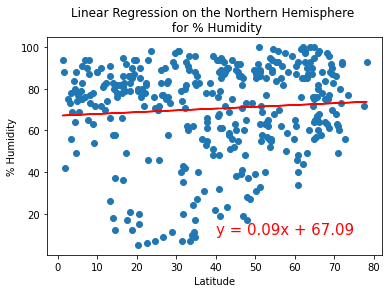

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

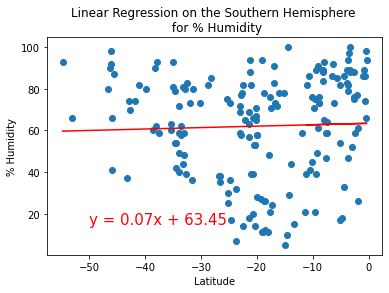

In [53]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

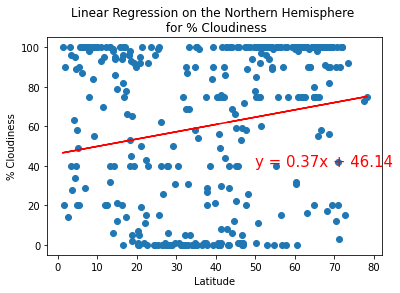

LinregressResult(slope=0.3700134049318515, intercept=46.136528043323835, rvalue=0.18832766058601302, pvalue=0.0003144713397575547, stderr=0.10169756916080348, intercept_stderr=4.49855481504319)

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,40))
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

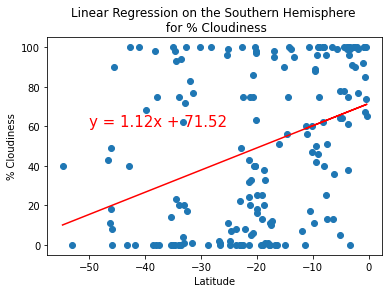

LinregressResult(slope=1.121155756602791, intercept=71.52409533557655, rvalue=0.3714461588801409, pvalue=3.31463294866365e-07, stderr=0.2112391295236645, intercept_stderr=4.991450710146503)

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"] )

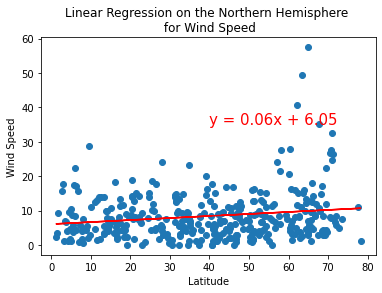

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

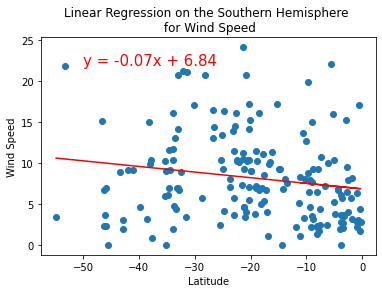

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,22))